In [ ]:
pip install pysal geopandas matplotlib


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 

In [ ]:
import geopandas as gpd
import pandas as pd
from libpysal.weights import Queen
from esda.moran import Moran
import numpy as np
from splot.esda import lisa_cluster
from esda.moran import Moran_Local
from splot.esda import plot_local_autocorrelation


# Carregar dados geográficos
geo_data = gpd.read_file("geojs-21-mun.json")

# Carregar dados tabulares
tabular_data = pd.read_excel("tabela6912(leite).xlsx", sheet_name="Vacas")

# Mesclar os dados
merged_data = geo_data.merge(tabular_data, left_on="name", right_on="Cidade")  # Substitua pela coluna correta


In [ ]:
merged_data

,id,name,description,geometry,Cidade,Total Vacas,Total Leite,Total Valor produção,Total Estabelecimentos com vendas,Total Quantidade vendida,...,Agricultura familiar - Sim - Proprietário(a) - De 51 a 100,Agricultura familiar - Sim - De 101 a 200,Agricultura familiar - Sim - Proprietário(a) - De 101 a 200,Agricultura familiar - Sim - De 201 a 500,Agricultura familiar - Sim - Proprietário(a) - De 201 a 500,Agricultura familiar - Sim - De 501 a 1000,Agricultura familiar - Sim - Proprietário(a) - De 501 a 1000,Agricultura familiar - Sim - De 1001 e mais,Agricultura familiar - Sim - Proprietário(a) - De 1001 e mais,População
0,2100055,Açailândia,Açailândia,"POLYGON ((-47.01661 -4.41956, -46.99895 -4.426...",Açailândia,16886,20227.38,18374.10,518,16773.06,...,128,91,83,40,38,2,2,0,0,NaN
1,2100154,Água Doce do Maranhão,Água Doce do Maranhão,"POLYGON ((-42.08106 -2.80004, -42.07141 -2.812...",Água Doce do Maranhão,37,29.39,88.17,4,5.9,...,0,0,0,0,0,0,0,0,0,NaN
2,2100204,Alcântara,Alcântara,"POLYGON ((-44.44867 -2.13069, -44.45121 -2.133...",Alcântara,30,35.39,74.03,0,0,...,1,1,1,0,0,0,0,0,0,NaN
3,2100303,Aldeias Altas,Aldeias Altas,"POLYGON ((-43.10642 -4.48175, -43.11555 -4.500...",Aldeias Altas,119,135.71,260.92,2,X,...,1,0,0,0,0,0,0,0,0,NaN
4,2100402,Altamira do Maranhão,Altamira do Maranhão,"POLYGON ((-45.54978 -3.98666, -45.48741 -4.060...",Altamira do Maranhão,654,636.61,1026.57,31,321.94,...,19,6,6,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2112803,Viana,Viana,"POLYGON ((-45.12056 -2.9299, -45.11946 -2.9361...",Viana,238,222.44,358.34,10,168.75,...,1,0,0,0,0,0,0,0,0,NaN
190,2112852,Vila Nova dos Martírios,Vila Nova dos Martírios,"POLYGON ((-47.98411 -5.04582, -47.98011 -5.053...",Vila Nova dos Martírios,6263,9027.99,7805.42,196,8595.09,...,46,20,20,12,12,0,0,0,0,NaN
191,2112902,Vitória do Mearim,Vitória do Mearim,"POLYGON ((-44.86331 -3.34599, -44.83739 -3.424...",Vitória do Mearim,274,356.36,546.20,11,129.34,...,7,6,6,0,0,0,0,0,0,NaN
192,2113009,Vitorino Freire,Vitorino Freire,"POLYGON ((-45.33582 -3.9028, -45.32645 -3.9055...",Vitorino Freire,1973,1707.07,2114.56,96,1205.74,...,27,14,12,6,6,0,0,0,0,NaN


In [ ]:
merged_data["log_Total_Leite"] = np.log1p(merged_data["Total Leite"])

In [ ]:
# Criar matriz de pesos de vizinhança
weights = Queen.from_dataframe(merged_data)

weights.transform = 'r'


<ipython-input-34-0a21bbcefc2e>:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = Queen.from_dataframe(merged_data)


In [ ]:
# Variável para análise (exemplo: produção de leite)
var = merged_data["log_Total_Leite"].astype(float).values

# Cálculo de Moran
moran = Moran(var, weights)

print(f"I de Moran: {moran.I}")
print(f"p-value: {moran.p_sim}")


I de Moran: 0.6602423748251997
p-value: 0.001


(<Figure size 640x480 with 1 Axes>, <Axes: >)

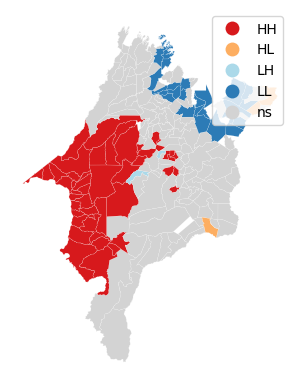

In [ ]:
# Cálculo de Moran Local
moran_local = Moran_Local(var, weights)

# Plotar clusters LISA
lisa_cluster(moran_local, merged_data)


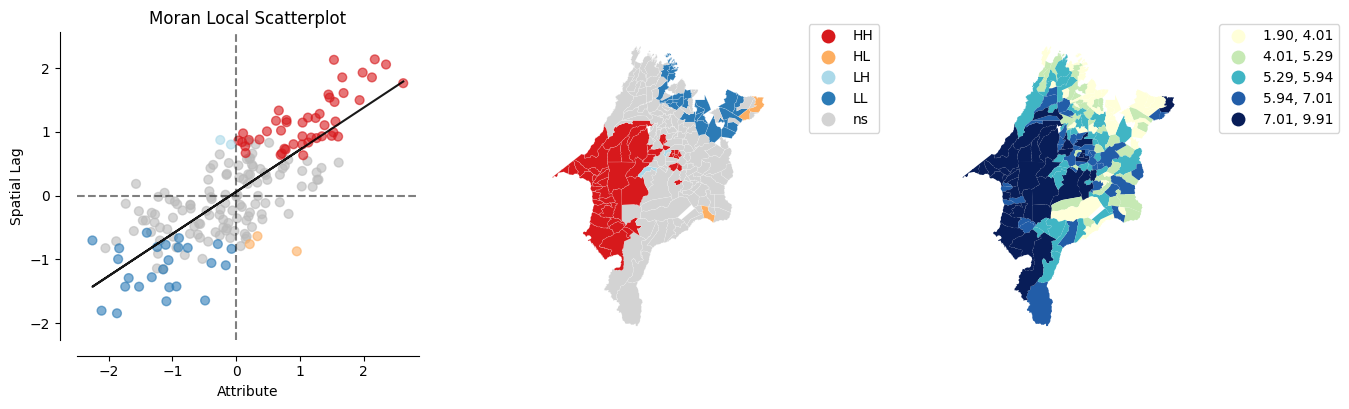

In [ ]:
# Plotar autocorrelação local
plot_local_autocorrelation(moran_local, merged_data, 'log_Total_Leite')
plt.show()

In [ ]:
merged_data = merged_data.replace("X", np.nan)
merged_data["Proporção QV"] = merged_data["Total Quantidade vendida"] / merged_data["Total Leite"]
proporção_média = merged_data["Proporção QV"].mean()

merged_data["Proporção VV"] = merged_data["Total  Valor de venda"] / merged_data["Total Valor produção"]
proporção_média_VV = merged_data["Proporção VV"].mean()

merged_data = merged_data.replace("X", np.nan)

merged_data["Proporção QVF"] = merged_data["F Quantidade vendida"] / merged_data["F Leite"]
proporção_média_QVF = merged_data["Proporção QVF"].mean()

merged_data["Proporção VVF"] = merged_data["F  Valor de venda"] / merged_data["F Valor produção"]
proporção_média_VVF = merged_data["Proporção VVF"].mean()

<ipython-input-79-a76e8bb239db>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data = merged_data.replace("X", np.nan)


In [ ]:
merged_data["Total Quantidade vendida"] = merged_data["Total Quantidade vendida"].fillna(merged_data["Total Leite"] * proporção_média).round(2)
merged_data["Total  Valor de venda"] = merged_data["Total  Valor de venda"].fillna(merged_data["Total Valor produção"] * proporção_média_VV).round(2)

merged_data["F Quantidade vendida"] = merged_data["F Quantidade vendida"].fillna(merged_data["F Leite"] * proporção_média_QVF).round(2)
merged_data["F  Valor de venda"] = merged_data["F  Valor de venda"].fillna(merged_data["F Valor produção"] * proporção_média_VVF).round(2)

In [ ]:
merged_data = merged_data.drop(columns=["Proporção VVF","Proporção QVF", "Proporção QV", "Proporção VV"])

In [ ]:
from esda.moran import Moran_BV

import matplotlib.pyplot as plt

x = merged_data["Total - Pronamp"].astype(float).values
y = merged_data["log_Total_Leite"].astype(float).values

moran_bv = Moran_BV(x, y, weights)

print(f"Índice de Moran Bivariado: {moran_bv.I}")
print(f"P-valor: {moran_bv.p_sim}")

Índice de Moran Bivariado: 0.5045573595049598
P-valor: 0.001


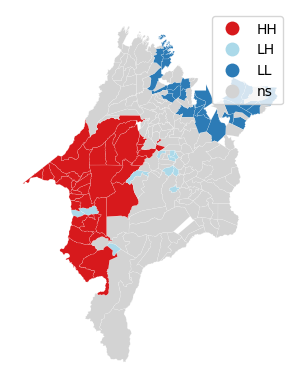

In [ ]:
from splot.esda import lisa_cluster

# Cálculo de Moran Bivariado
from esda.moran import Moran_Local_BV
moran_local_bv = Moran_Local_BV(x, y, weights)

# Plotar clusters LISA Bivariado
lisa_cluster(moran_local_bv, merged_data)
plt.show()

In [ ]:
rodovias_data = gpd.read_file("rodovias_federais_brasil.json")

In [ ]:
rodovias_data = gpd.read_file("rodovias_federais_brasil.json")

# Filtrar apenas as rodovias no Maranhão (sg_uf == "MA")
rodovias_data = rodovias_data[rodovias_data["sg_uf"] == "MA"]



In [ ]:
rodovias_data

,id_trecho_,vl_br,sg_uf,nm_tipo_tr,sg_tipo_tr,desc_coinc,vl_codigo,ds_local_i,ds_local_f,vl_km_inic,...,leg_multim,versao_snv,id_versao,marcador,shape_Leng,InLine_FID,SimLnFlag,MaxSimpTol,MinSimpTol,geometry
20,151178,010,MA,Eixo Principal,B,-,010BMA0390,ENTR BR-226(A)/230(B)/MA-138 (ESTREITO),ENTR BR-226(B) (PORTO FRANCO),128.8,...,Pavimentada,202210C,67,|,0.249101,26,0,0.000009,0.000009,"LINESTRING (-47.45054 -6.55797, -47.44518 -6.5..."
26,151183,010,MA,Eixo Principal,B,-,010BMA0430,INÍCIO TRAV URB IMPERATRIZ,ENTR MA-122 (IMPERATRIZ),246.4,...,Pavimentada,202210C,67,|,0.066068,31,0,0.000009,0.000009,"LINESTRING (-47.44083 -5.57834, -47.4705 -5.53..."
31,151176,010,MA,Eixo Principal,B,-,010BMA0360,DIV TO/MA,ENTR BR-230(A) (CAROLINA),0.0,...,Planejada,202210C,67,|,0.295554,24,0,0.000009,0.000009,"LINESTRING (-47.35315 -7.61827, -47.45367 -7.3..."
32,151177,010,MA,Eixo Principal,B,-,010BMA0370,ENTR BR-230(A) (CAROLINA),ENTR BR-226(A)/230(B)/MA-138 (ESTREITO),34.0,...,Pavimentada,202210C,67,|,0.856807,25,0,0.000009,0.000009,"LINESTRING (-47.45367 -7.34033, -47.4412 -7.32..."
33,151179,010,MA,Eixo Principal,B,-,010BMA0400,ENTR BR-226(B) (PORTO FRANCO),CAMPESTRE DO MARANHÃO,156.4,...,Pavimentada,202210C,67,|,0.188159,27,0,0.000009,0.000009,"LINESTRING (-47.3761 -6.35272, -47.36538 -6.30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,162101,402,MA,Eixo Principal,B,-,402BMA0112,ENTR MA-034 (P/BARRO DURO),ENTR MA-345(A),253.5,...,Planejada,202210C,67,|,0.218625,6072,0,0.000009,0.000009,"LINESTRING (-42.27855 -2.94852, -42.27165 -2.9..."
6190,162100,402,MA,Eixo Principal,B,-,402BMA0122,ENTR MA-345(A),ENTR MA-345(B) (P/NOVO HORIZONTE),277.8,...,Pavimentada,202210C,67,|,0.021783,6073,0,0.000009,0.000009,"LINESTRING (-42.09511 -3.04835, -42.07639 -3.0..."
6191,162099,402,MA,Eixo Principal,B,-,402BMA0132,ENTR MA-345(B) (P/NOVO HORIZONTE),ENTR MA-345(C),280.2,...,Planejada,202210C,67,|,0.024899,6074,0,0.000009,0.000009,"LINESTRING (-42.07639 -3.03721, -42.06397 -3.0..."
6192,162098,402,MA,Eixo Principal,B,-,402BMA0142,ENTR MA-345(C),ACESSO P/*NOME POVOADO*,283.0,...,Pavimentada,202210C,67,|,0.034312,6075,0,0.000009,0.000009,"LINESTRING (-42.05179 -3.03643, -42.02092 -3.0..."


In [ ]:
geo_data = geo_data.to_crs("EPSG:31983")
rodovias_data = rodovias_data.to_crs(geo_data.crs)


In [ ]:
from shapely.ops import nearest_points

# Função para calcular distância mínima
def calculate_distance(municipio, rodovias):
    nearest_geom = nearest_points(municipio.centroid, rodovias.unary_union)[1]
    return municipio.centroid.distance(nearest_geom)

# Aplicar a função para cada município
geo_data["dist_rodovias"] = geo_data.geometry.apply(calculate_distance, rodovias=rodovias_data)


<ipython-input-21-deff726a94ee>:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nearest_geom = nearest_points(municipio.centroid, rodovias.unary_union)[1]


In [ ]:
# Mesclar dados tabulares
merged_data = geo_data.merge(tabular_data, left_on="name", right_on="Cidade")

# Verificar o DataFrame final
print(merged_data[["name", "dist_rodovias", "Total Leite"]].head())


                    name  dist_rodovias  Total Leite
0             Açailândia    7497.766224     20227.38
1  Água Doce do Maranhão    3984.978244        29.39
2              Alcântara   11218.446111        35.39
3          Aldeias Altas   37963.326679       135.71
4   Altamira do Maranhão   28230.510654       636.61


In [ ]:
from libpysal.weights import KNN

# Criar pesos espaciais (ex.: 5 vizinhos mais próximos)
w = KNN.from_dataframe(merged_data, k=5)
w.transform = 'r'


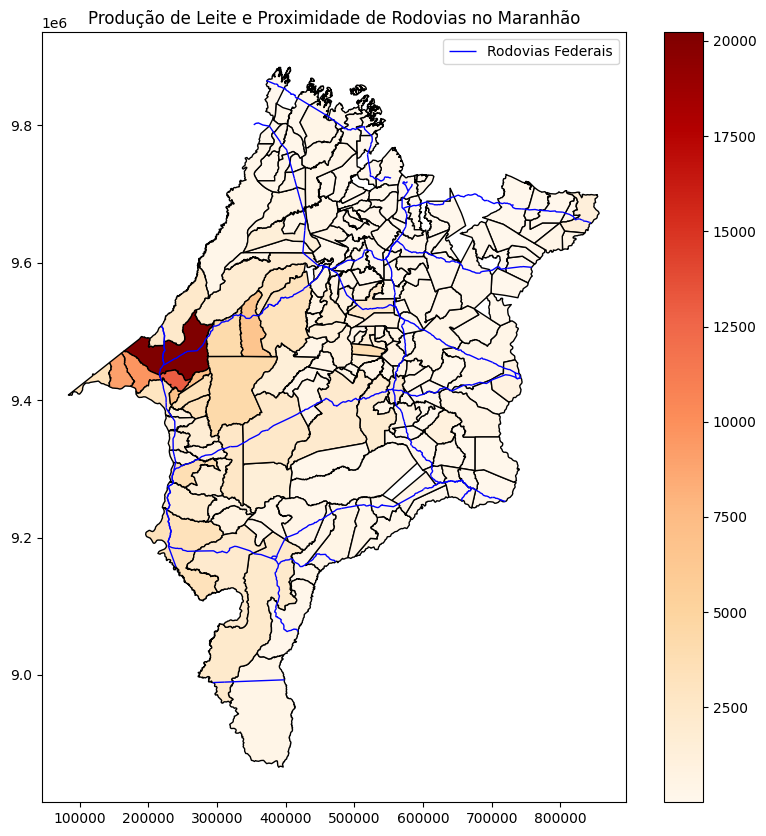

In [ ]:
import matplotlib.pyplot as plt

# Criar mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Total Leite', cmap='OrRd', legend=True, ax=ax, edgecolor='black')

# Sobrepor as rodovias
rodovias_data.plot(ax=ax, color='blue', linewidth=1, label="Rodovias Federais")

# Adicionar títulos e legenda
plt.title("Produção de Leite e Proximidade de Rodovias no Maranhão")
plt.legend()
plt.show()


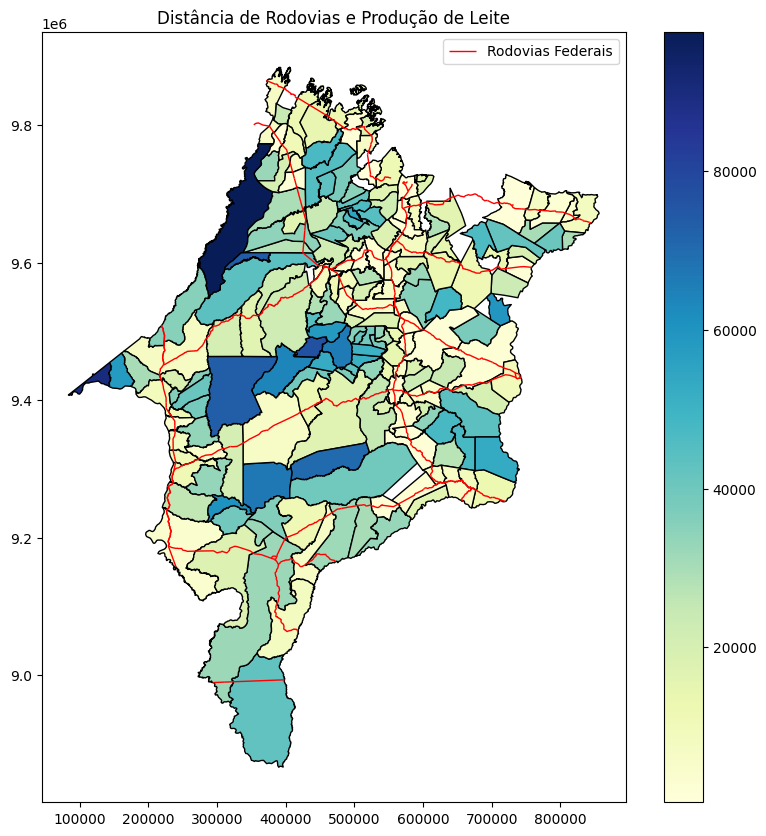

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotar distâncias em cor
merged_data.plot(column='dist_rodovias', cmap='YlGnBu', legend=True, ax=ax, edgecolor='black')

# Sobrepor as rodovias
rodovias_data.plot(ax=ax, color='red', linewidth=1, label="Rodovias Federais")

# Plotar produção de leite com círculos ajustados
# ax.scatter(geo_data.geometry.centroid.x,
#            geo_data.geometry.centroid.y,
#            s=10,  # O tamanho dos círculos deve ser um vetor com o mesmo tamanho que as coordenadas
#            color='blue',
#            alpha=0.6,
#            edgecolor='black',
#            label="Produção de Leite")

plt.title("Distância de Rodovias e Produção de Leite")
plt.legend()
plt.show()


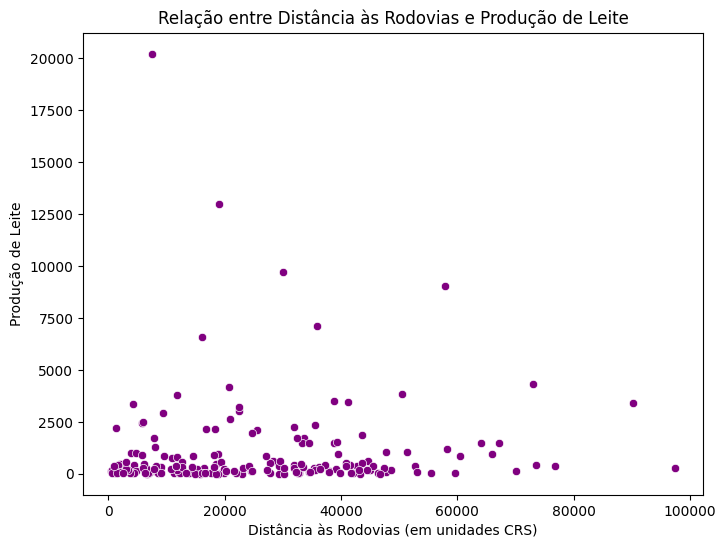

In [ ]:
import seaborn as sns

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='dist_rodovias', y='Total Leite', color='purple')

plt.title("Relação entre Distância às Rodovias e Produção de Leite")
plt.xlabel("Distância às Rodovias (em unidades CRS)")
plt.ylabel("Produção de Leite")
plt.show()


<ipython-input-27-1c03d4656492>:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_data)


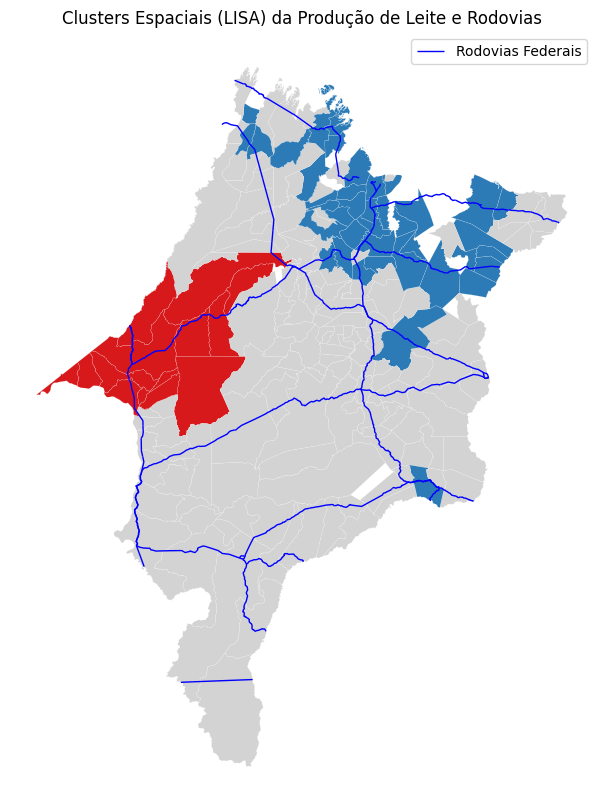

In [ ]:
# Criar pesos espaciais
w = Queen.from_dataframe(merged_data)

# Calcular LISA
y = merged_data['Total Leite'].values
lisa = Moran_Local(y, w)

# Plotar o mapa LISA
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
lisa_cluster(lisa, merged_data, p=0.05, ax=ax)
rodovias_data.plot(ax=ax, color='blue', linewidth=1, label="Rodovias Federais")

plt.title("Clusters Espaciais (LISA) da Produção de Leite e Rodovias")
plt.legend()
plt.show()


In [ ]:
# Criar pesos espaciais (contiguidade da rainha)
w = Queen.from_dataframe(merged_data)
w.transform = 'r'  # Padronizar os pesos


<ipython-input-28-38307471cdca>:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_data)


In [ ]:
from esda import Moran_BV

# Variáveis para o Moran Bivariado
x = merged_data['dist_rodovias'].values  # Distância até rodovias
y = merged_data['Total Leite'].values   # Produção de leite

# Calcular o Moran Bivariado
moran_bv = Moran_BV(x, y, w)

# Exibir o valor do índice e o p-valor
print(f"Índice de Moran Bivariado: {moran_bv.I}")
print(f"P-valor: {moran_bv.p_sim}")


Índice de Moran Bivariado: 0.18751154077428484
P-valor: 0.002


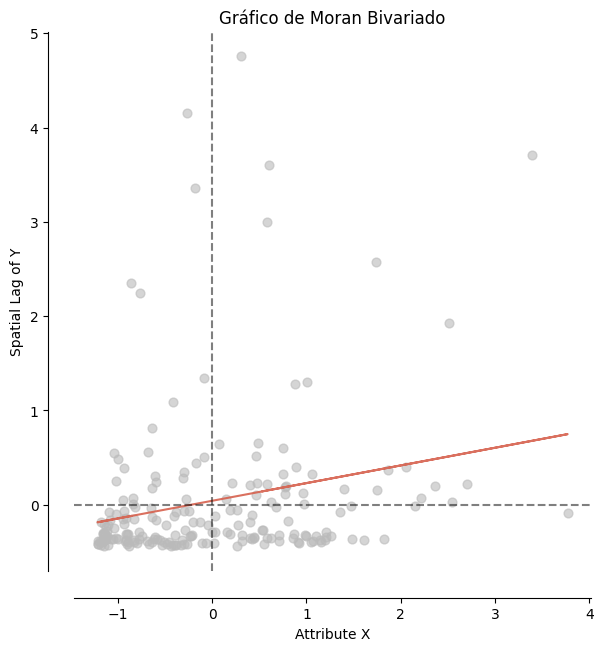

In [ ]:
from splot.esda import moran_scatterplot

# Visualizar o gráfico de dispersão Moran Bivariado
fig, ax = moran_scatterplot(moran_bv)
plt.title("Gráfico de Moran Bivariado")
plt.show()
